In [ ]:
#loading basic dependencies
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

In [148]:
#loading data
data=pd.read_csv("train.csv")

In [ ]:
#getting first 5 rows
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#getting stastical information
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
#getting statstical information about categorical data
data.describe(include="object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [ ]:
#getting shape of the data
data.shape

(54808, 14)

Class 0: 50140
Class 1: 4668
Proportion: 10.74 : 1


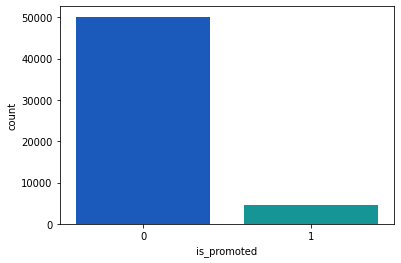

In [ ]:
#Getting class distrubtion 
target_class=data.is_promoted.value_counts()
print('Class 0:', target_class[0])
print('Class 1:', target_class[1])
print('Proportion:', round(target_class[0] / target_class[1], 2), ': 1')

sns.countplot('is_promoted', data=data, palette='winter');

In [ ]:
#checking null values
data.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [ ]:
#imputing the null values
data['education'].fillna("No Education", inplace = True)
data['previous_year_rating'].fillna(data['previous_year_rating'].mean(), inplace=True)

In [ ]:
#checking for null values after imputation
data.isnull().any().any()

False

In [ ]:
#Using label encoder for converting categorical values to numerical values
lb=LabelEncoder()
data['department']= lb.fit_transform(data['department'])
data['region']= lb.fit_transform(data['region'])
data['education']= lb.fit_transform(data['education'])
data['gender']= lb.fit_transform(data['gender'])
data['recruitment_channel']= lb.fit_transform(data['recruitment_channel'])

In [ ]:
#Loading Inliers and Outliers
inliers = data[data.is_promoted==0]
inliers = inliers.drop(['is_promoted'], axis=1)
outliers = data[data.is_promoted==1]
outliers = outliers.drop(['is_promoted'], axis=1)
inliers_train, inliers_test = train_test_split(inliers, test_size=0.30, random_state=42)

In [ ]:
inliers_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
15039,40567,2,11,2,1,0,1,42,3.0,7,0,0,51
54735,32519,4,6,0,1,0,1,34,1.0,10,0,0,62
25915,4352,5,6,2,1,2,1,40,3.0,6,0,0,71
24580,37948,4,19,0,1,0,1,31,5.0,7,1,0,55
46101,74734,4,14,0,0,2,1,34,3.0,4,0,0,61


In [ ]:
inliers_test.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
47075,67894,8,7,0,0,2,1,40,3.000000,4,0,0,81
4896,41796,4,14,0,1,0,1,26,3.329256,1,0,0,63
20078,77272,7,14,0,1,2,1,25,4.000000,4,1,0,51
27008,23299,7,33,0,1,2,1,24,3.329256,1,0,0,50
10115,60733,5,15,0,0,2,1,33,5.000000,6,1,0,69


# Isolation Forest

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

# Parameters



*   n_estimators : The number of base estimators in the ensemble.

*   max_samples : The number of samples to draw from X to train each base estimator.

*   max_features:The number of features to draw from X to train each base estimator.




In [186]:
model = IsolationForest(n_estimators=100,max_samples=10)
model.fit(inliers_train)
inlier_pred_test = model.predict(inliers_test)
outlier_pred = model.predict(outliers)

In [187]:
print("Accuracy in Detecting Non Promotion:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Promotion:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting Non Promotion: 0.21546336923281478
Accuracy in Detecting Promotion: 0.890745501285347
